In [1]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
import sncosmo
import pandas as pd
from bayesn import SEDmodel

##Second program
import extinction
import pickle

In [2]:
supernova_name = "sn2005A"
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"

In [3]:
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

In [4]:
dust_law = "G23"
model_name = "W22_G23_model"
sampleChainsDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_G23 = np.reshape(chains['RV'], 1000)
AV_from_chains_G23 = np.reshape(chains['AV'], 1000)

extAVG23 = np.zeros([len(RV_from_chains_G23), 1000])
for i in np.arange(len(RV_from_chains_G23)):
    RV_G23 = RV_from_chains_G23[i]
    RV_G23 = np.reshape(RV_G23, 1)
    extG23 = G23(Rv=RV_G23)
    extAVG23[i,:] = AV_from_chains_G23[i]*extG23(wavelengths)
print(extAVG23)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[[19.14931404 18.93562876 18.72536371 ...  0.11782904  0.11714576
   0.11610591]
 [21.09914231 20.85776085 20.62022758 ...  0.0823743   0.08188046
   0.0810837 ]
 [21.04902097 20.80859846 20.57200982 ...  0.08525951  0.08475002
   0.08393249]
 ...
 [18.88717354 18.67665104 18.46949875 ...  0.11811451  0.11743023
   0.11639064]
 [21.05048323 20.8095438  20.57244522 ...  0.08126823  0.08078052
   0.07999234]
 [21.18598309 20.94513106 20.7081226  ...  0.09488291  0.0943206
   0.09343107]]


In [5]:
dust_law = "F19"
model_name = "W22_F19_model"
sampleChainsDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_F19 = np.reshape(chains['RV'], 1000)
AV_from_chains_F19 = np.reshape(chains['AV'], 1000)

extAVF19 = np.zeros([len(RV_from_chains_F19), 1000])
for i in np.arange(len(RV_from_chains_F19)):
    RV_F19 = RV_from_chains_F19[i]
    RV_F19 = np.reshape(RV_F19, 1)
    extF19 = F19(Rv=RV_F19)
    extAVF19[i,:] = AV_from_chains_F19[i]*extF19(wavelengths)
print(extAVF19)

[[ 1.64403663e+01  1.62774815e+01  1.61175418e+01 ... -5.29140199e-03
  -5.13496675e-03 -4.97776417e-03]
 [ 1.61287380e+01  1.59695116e+01  1.58131376e+01 ... -4.95318645e-03
  -4.80037934e-03 -4.64681454e-03]
 [ 1.53721726e+01  1.52328701e+01  1.50954832e+01 ...  4.70082711e-04
   6.01258896e-04  7.33264107e-04]
 ...
 [ 1.69598918e+01  1.67884376e+01  1.66202422e+01 ... -6.88489365e-03
  -6.71954104e-03 -6.55342619e-03]
 [ 1.66604637e+01  1.64924045e+01  1.63275229e+01 ... -6.60995948e-03
  -6.44795353e-03 -6.28519565e-03]
 [ 1.54494520e+01  1.53093703e+01  1.51712188e+01 ...  4.39523209e-04
   5.71450577e-04  7.04210461e-04]]


In [6]:
dust_law = "F99"
model_name = "W22_F99_model"
sampleChainsDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_F99 = np.reshape(chains['RV'], 1000)
AV_from_chains_F99 = np.reshape(chains['AV'], 1000)

extAVF99 = np.zeros([len(RV_from_chains_F99), 1000])
for i in np.arange(len(RV_from_chains_F99)):
    RV_F99 = RV_from_chains_F99[i]
    RV_F99 = np.reshape(RV_F99, 1)
    extF99 = F99(Rv=RV_F99)
    extAVF99[i,:] = AV_from_chains_F99[i]*extF99(wavelengths)
print(extAVF99)

[[19.00183806 18.8042165  18.6096429  ...  0.03001118  0.02983514
   0.02966024]
 [19.56430158 19.36214947 19.16307554 ...  0.02777217  0.02760458
   0.02743811]
 [16.77706373 16.6007912  16.42729466 ...  0.03134184  0.03116544
   0.03099014]
 ...
 [18.82096907 18.62703441 18.43603706 ...  0.02552791  0.0253719
   0.02521696]
 [16.67970299 16.50405279 16.3311822  ...  0.03236729  0.03218672
   0.03200726]
 [16.87657965 16.69862006 16.52348466 ...  0.03348541  0.03329954
   0.03311482]]


In [7]:
dust_law = "F99"
model_name = ""
sampleChainsDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_W22 = np.reshape(chains['RV'], 1000)
AV_from_chains_W22 = np.reshape(chains['AV'], 1000)

extAVW22 = np.zeros([len(RV_from_chains_W22), 1000])
for i in np.arange(len(RV_from_chains_W22)):
    RV_W22 = RV_from_chains_W22[i]
    RV_W22 = np.reshape(RV_W22, 1)
    extW22 = F99(Rv=RV_W22)
    extAVW22[i,:] = AV_from_chains_W22[i]*extW22(wavelengths)
print(extAVW22)

[[18.94667153 18.75178551 18.55984123 ...  0.02496046  0.02480667
   0.02465392]
 [18.66408632 18.47174191 18.28231149 ...  0.02537229  0.02521734
   0.02506343]
 [18.70735942 18.51477796 18.32510802 ...  0.02497988  0.02482656
   0.02467427]
 ...
 [17.3787316  17.19674551 17.01760555 ...  0.03072352  0.03054831
   0.0303742 ]
 [17.46249813 17.27992977 17.10020721 ...  0.03006193  0.02988938
   0.02971792]
 [17.0462643  16.86700748 16.69057883 ...  0.03230838  0.03212715
   0.03194705]]


In [8]:
#Sorting out frequency in each band
band_names = ["U", "B", "G", "g", "V", "R", "r", "I","i","z", "Z", "Y", "J", "H", "K", "L", "M", "N", "Q"]
mean_wavelength_per_band = [365, 445, 464, 464, 551, 658, 658, 806, 806, 893.2, 900, 1020, 1220, 1630, 2190, 3450, 4750, 10500, 21000]
print(len(band_names))
print(len(mean_wavelength_per_band))
data = {"Band": band_names,
  "Wavelength": mean_wavelength_per_band,
       "Frequency":np.zeros(len(band_names))}
band_wavelengths = pd.DataFrame(data)
print(band_wavelengths)

19
19
   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0        0.0
2     G       464.0        0.0
3     g       464.0        0.0
4     V       551.0        0.0
5     R       658.0        0.0
6     r       658.0        0.0
7     I       806.0        0.0
8     i       806.0        0.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0        0.0
12    J      1220.0        0.0
13    H      1630.0        0.0
14    K      2190.0        0.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0        0.0
18    Q     21000.0        0.0


In [9]:
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
lcdata = lcdata['OBS'].to_pandas()
bands = np.unique(lcdata['FLT'])
for i, entry in lcdata.iterrows():
    entry_band = entry.FLT
    if entry_band[0] in band_names:
        entry_band_index =  band_names.index(entry_band[0])
        band_wavelengths.at[entry_band_index, 'Frequency'] = band_wavelengths.at[entry_band_index, 'Frequency'] + 1
    else:
        print(entry_band + " Not in our list")
print(band_wavelengths)

   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0       17.0
2     G       464.0        0.0
3     g       464.0       28.0
4     V       551.0       28.0
5     R       658.0        0.0
6     r       658.0       33.0
7     I       806.0        0.0
8     i       806.0       33.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0       14.0
12    J      1220.0       14.0
13    H      1630.0       15.0
14    K      2190.0        0.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0        0.0
18    Q     21000.0        0.0


In [10]:
#Get the mean and std for the range
plt.rcParams.update({'font.size': 20})
extAVG23_mean = np.mean(extAVG23, axis=0)
extAVG23_std = np.std(extAVG23, axis=0)
extAVF19_mean = np.mean(extAVF19, axis=0)
extAVF19_std = np.std(extAVF19, axis=0)
extAVF99_mean = np.mean(extAVF99, axis=0)
extAVF99_std = np.std(extAVF99, axis=0)
extAVW22_mean = np.mean(extAVW22, axis=0)
extAVW22_std = np.std(extAVW22, axis=0)

/tmp/ipykernel_9732/3060323647.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


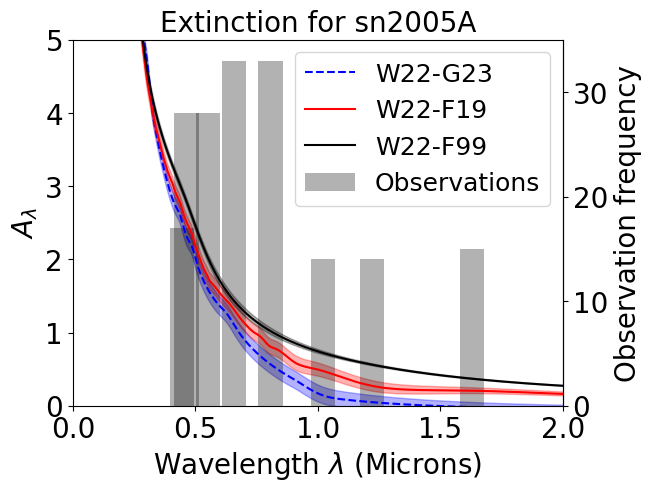

In [11]:
fig, ax = plt.subplots(layout='constrained')

ax.set_xlabel(rf'Wavelength $\lambda$ (Microns)',fontsize = 20)
ax.set_ylabel(rf'$A_\lambda$',fontsize = 20)
ax.set_title('Extinction for '+ supernova_name,fontsize = 20)
ax.plot(wavelengths, extAVG23_mean, '--b', label = rf"W22-G23")
ax.plot(wavelengths, extAVF19_mean, '-r' ,label = rf"W22-F19")
#ax.plot(wavelengths, extAVF99_mean,  ':g', label = rf"F99")
ax.plot(wavelengths, extAVW22_mean,  'k', label = rf"W22-F99")

ax.fill_between(wavelengths, extAVG23_mean-extAVG23_std, extAVG23_mean+extAVG23_std, interpolate = True, alpha=0.3, color="b")
ax.fill_between(wavelengths, extAVF19_mean-extAVF19_std, extAVF19_mean+extAVF19_std, interpolate = True, alpha=0.3, color="r")
#ax.fill_between(wavelengths, extAVF99_mean-extAVF99_std, extAVF99_mean+extAVF99_std, interpolate = True, alpha=0.3, color="g")
ax.fill_between(wavelengths, extAVW22_mean-extAVW22_std, extAVW22_mean+extAVW22_std, interpolate = True, alpha=0.3, color="k")

#x_1 = np.linspace(0, 20, 1000)
#ax.plot(x_1-x_1+0.5,x_1, 'y')
#ax.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")
ratio = 7
ax.bar(band_wavelengths["Wavelength"]/1000, band_wavelengths["Frequency"]/ratio, width=0.1, bottom=None, align='center', color = 'k', alpha = .3, label = "Observations")

def A_to_frequency(x):
    return x*ratio

def frequency_to_A(x):
    return x/ratio

secax_y = ax.secondary_yaxis('right', functions=(A_to_frequency, frequency_to_A))

secax_y.set_ylabel("Observation frequency" ,fontsize = 20)

ax.set_ylim(0,5)
ax.set_xlim(0,2)
ax.legend(fontsize = 18)

fig.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurveAllModels"+supernova_name+".png", bbox_inches='tight') 
fig.show()

## Print mean Av and Rv

In [13]:
print("Order: W22, F99, F19, G23")
print("Av"+", "+ str(np.mean(AV_from_chains_W22))+", "+str(np.mean(AV_from_chains_F99))+", "+str(np.mean(AV_from_chains_F19))+", "+str(np.mean(AV_from_chains_G23)))
print("Rv"+", "+ str(np.mean(RV_from_chains_W22))+", "+str(np.mean(RV_from_chains_F99))+", "+str(np.mean(RV_from_chains_F19))+", "+str(np.mean(RV_from_chains_G23))) 

Order: W22, F99, F19, G23
Av, 2.0985716725327648, 2.125230857480573, 1.766738768855425, 1.62542536170351
Rv, 2.226069349756507, 2.242589890156306, 1.7980084886026215, 1.6116817283951388
